<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Regression/Regression_%7C_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
In tasks, use a linear regression model from the sklearn library:

from sklearn.linear_model import LinearRegression

Train the model with default settings (with default arguments when creating an object of the LinearRegression class): LinearRegression().fit(X, y)

[Full description of the linear regression model from the sklearn library.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you think that you wrote the correct code, but the answers are not accepted by the verification system, send a link to your notebook in Google Colab with editing rights or *.ipynb file to our mail dc@itmo.ru. Don't forget to introduce yourself and enter your openedu username.

## Task 1

You have the observation results of time that a person spent in a line in relation to the number of people in the line.

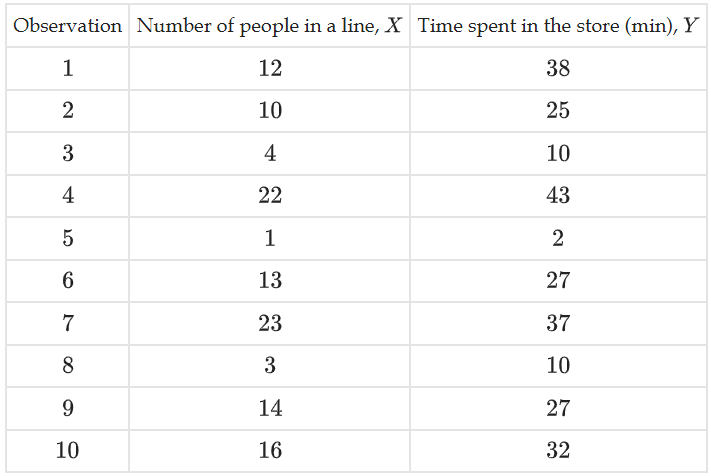

Below, the table data is presented in a row format:

id,X,Y

1,12,38

2,10,25

3,4,10

4,22,43

5,1,2

6,13,27

7,23,37

8,3,10

9,14,27

10,16,32

Train the linear regression model to predict the values and enter the specified parameters.

> Find the sample mean $\bar{X}$:

> Find the sample mean $\bar{Y}$:

> Calculate the coefficient $\theta_0$

> Calculate the coefficient $\theta_1$

> Estimate the model accuracy by calculating R-squared statistics, $R^2$:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X = np.array([12, 10, 4, 22, 1, 13, 23, 3, 14, 16])
Y = np.array([38, 25, 10, 43, 2, 27, 37, 10, 27, 32])

In [ ]:
x = np.mean(X)
y = np.mean(Y)
print(f'the sample mean X: {x}')
print(f'the sample mean Y: {y}')

the sample mean X: 11.8
the sample mean Y: 25.1


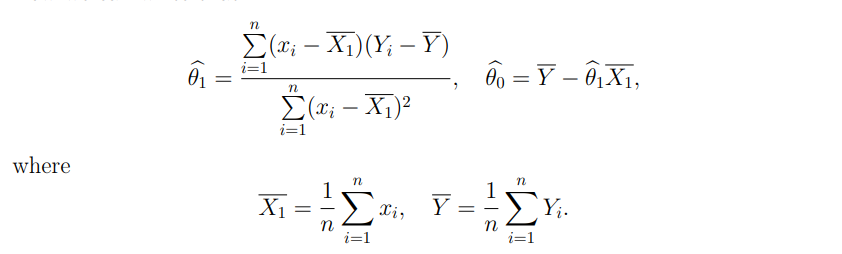


In [ ]:
theta1 = sum([(X[i]-x)*(Y[i]-y) for i in range(len(X))])/sum([(X[i]-x)**2 for i in range(len(X))])
theta0 = y - theta1*x

print(f'theta1: {round(theta1,2)}, theta0: {round(theta0,2)}')

theta1: 1.67, theta0: 5.4


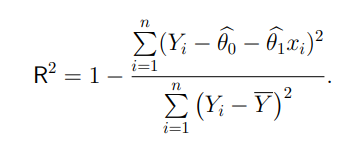

In [ ]:
R2 = 1 - sum([(Y[i]-theta0-theta1*X[i])**2 for i in range(len(X))]) / sum([(Y[i]-y)**2 for i in range(len(Y))])
print(f'R**2: {round(R2, 2)}')

R**2: 0.85


## Task2

[The provided dataset](https://drive.google.com/file/d/1pKxrteRNJQhQDU3hcsCsyy1cIQTf0rU-/view?usp=drive_link) consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

**IMPORTANT:** Tasks with detailed explanations are presented in the notebook. When completing tasks in the notebook, you should enter your answers in the appropriate input boxes below. It is recommended that you enter the answers step by step, with a sufficient number of attempts provided for this purpose.

Use `train_test_split()` to split the dataset into training and test samples with parameters `test_size=0.2, random_state=21`. Use stratification by column Species. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

> Find sample mean for the column Width of the obtained training sample.
> 1. Building a base model
Remove categorical features and train a linear regression model on the training dataset. Perform predictions on the test dataset.
Evaluate the model using the metric `r2_score()`.

* Enter `r2_score()` of the obtained model.

> 2. Adding feature preprocessing

**Use of PCA**

* List, separated by comma and space, the top three most correlated features that are dropped.
* Train a PCA model for the three most correlated features. Enter the explained variance ratio when using only the first principal component.
* Replace the top three most correlated features with the obtained feature whose values coincide with the scores for the first principal component. Train the linear regression model. Enter `r2_score()` of the obtained model.

**Feature engineering**

* Using the dataset obtained at the previous step, cube the values of the features Width, Height, Lengths. Enter the sample mean for the column Width of the training dataset after cubeization.

Images corresponding to the dependence of Weight on Width before the transformation and after.

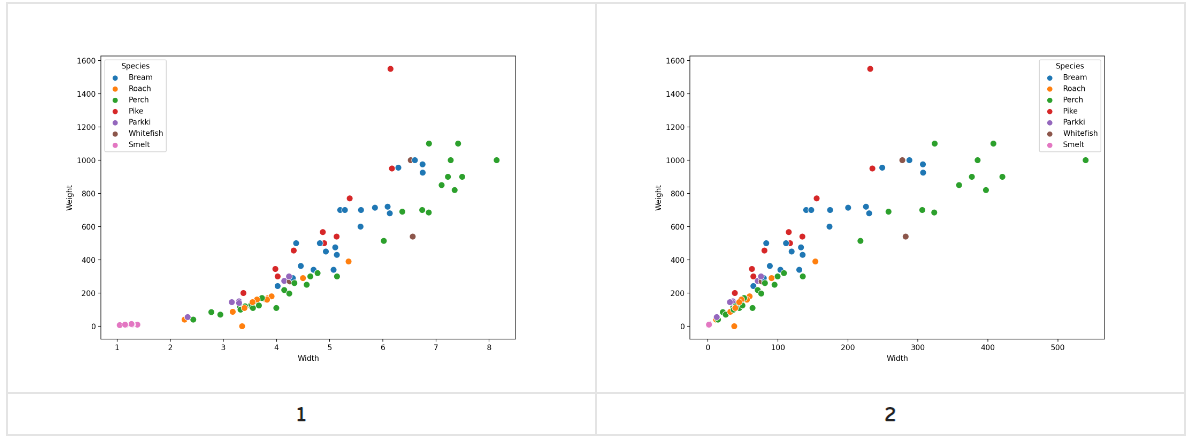

* Enter the image number corresponding to the dependence of Weight on Width after transformation. (Enter the number 1 or 2.)

* Train the linear regression model. Enter `r2_score()` of the obtained model

**Adding categorical features**

* Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using `pd.get_dummies()`. Train the linear regression model. Enter `r2_score()` of the obtained model.

* Encode categorical features using `pd.get_dummies(drop_first=True)`. Enter `r2_score()` of the model obtained after eliminating a feature correlation.



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/fish_train.csv', encoding = 'utf-8', delimiter=',')

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=21, stratify=data['Species'])

In [ ]:
round(np.mean(train['Width']), 3)

4.485

**1. Building a base model**

Removing categorical features and training a linear regression model on a training dataset. Making a prediction for a test dataset.

In [ ]:
y_train = train['Species']
train.drop(axis=1, columns=['Species'], inplace=True)
train

,Weight,Length1,Length2,Length3,Height,Width
83,680.0,31.8,35.0,40.6,15.4686,6.1306
92,700.0,31.9,35.0,40.5,16.2405,5.5890
2,430.0,26.5,29.0,34.0,12.4440,5.1340
43,160.0,21.1,22.5,25.0,6.4000,3.8000
10,115.0,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...,...
84,9.8,11.4,12.0,13.2,2.2044,1.1484
67,260.0,25.4,27.5,28.9,7.1672,4.3350
21,900.0,37.0,40.0,42.5,11.7300,7.2250
72,390.0,29.5,31.7,35.0,9.4850,5.3550


In [ ]:
y_train
pd.get_dummies(train, columns=['Species'], drop_first= True)
train

,Species,Weight,Length1,Length2,Length3,Height,Width
83,Bream,680.0,31.8,35.0,40.6,15.4686,6.1306
92,Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
43,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
10,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...,...,...
84,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
67,Perch,260.0,25.4,27.5,28.9,7.1672,4.3350
21,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250
72,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550


In [ ]:
reg = LinearRegression().fit(train, y_train)

ValueError: ignored